# House Pricing Analysis

# Problem definition

Many factors may affect the price of a house. Such as the area, the number of bedrooms,  etc..
beside this importent features, we have alot of unrelative features that may confuse our decision. In other words, this multidimentionality increases the noise and makes it hard to predict the price, given the house features. However, using machine learning algorithms can select important features and give a very good prediction after training. In this project we will explore "Boston Housing" dataset and train number of different modules to predict the prices of the houses. Then, we will calculate the score of each one.

# Setup and load data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train_num = len(train)
idTest = test['Id']
both = pd.concat([train.drop('SalePrice',axis=1),test],ignore_index=True)

# Data Exploring

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Visualizing missing values

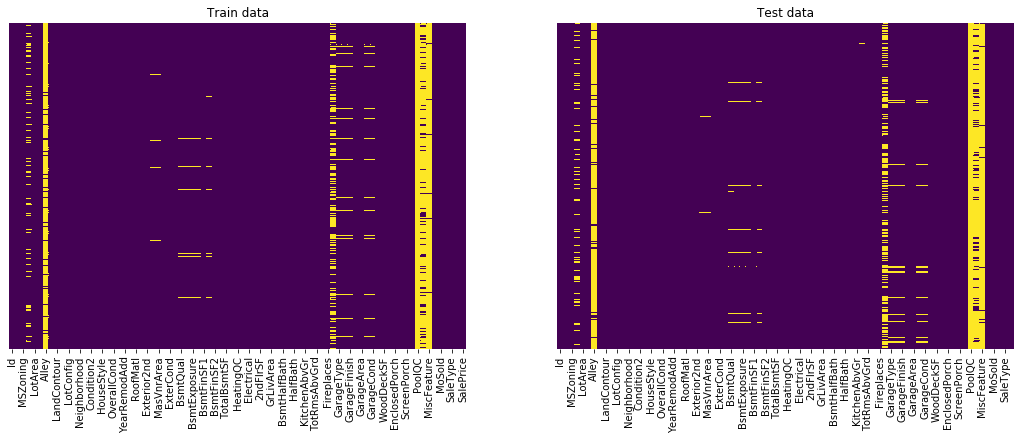

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

### Visualizing the distribution of the target values 

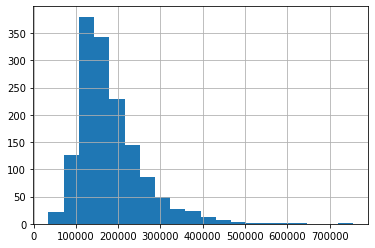

In [15]:
train['SalePrice'].hist(bins=20)

### Visualizing the correlation between features

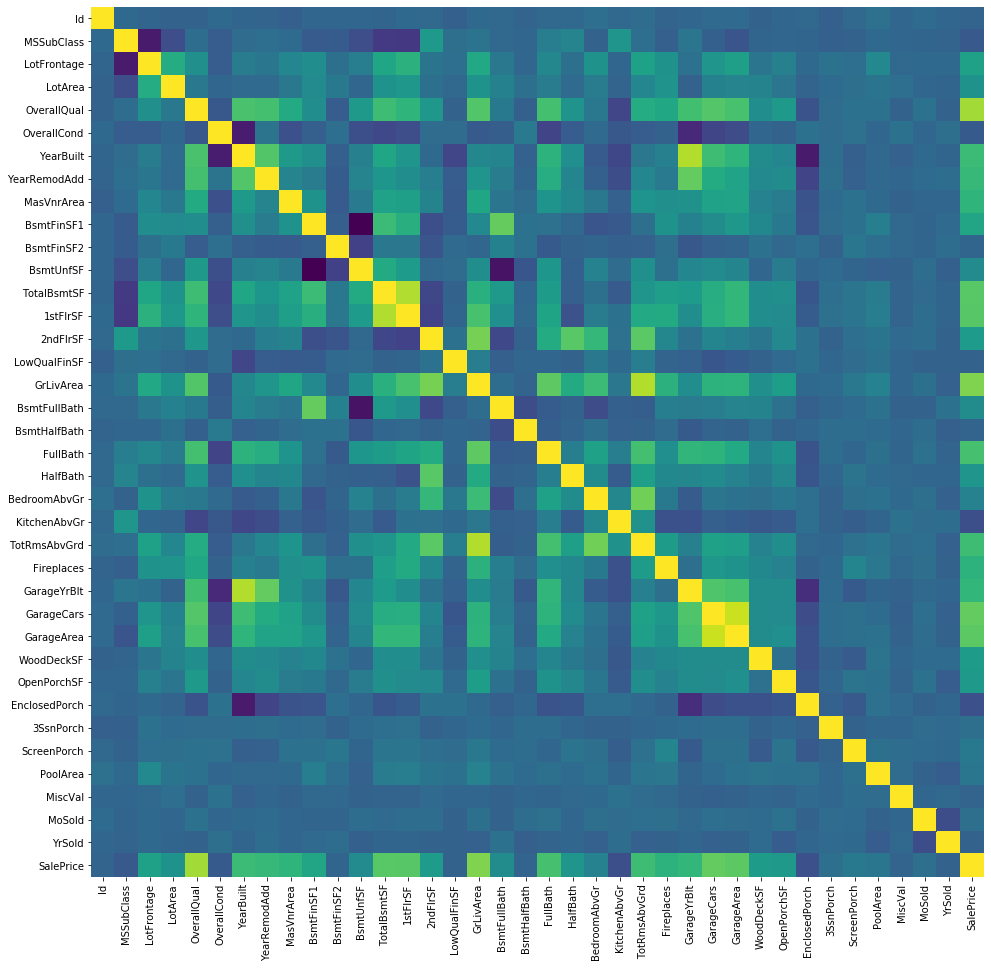

In [16]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), annot=False, cbar = False,cmap = 'viridis')
plt.show()

# Cleaning 

## Filling Not Applicable values in the data

In [17]:
both['PoolQC'] = both['PoolQC'].fillna('NA')
both['Fence'] = both['Fence'].fillna('NA')
both['MiscFeature'] = both['MiscFeature'].fillna('NA')
both['GarageQual'] = both['GarageQual'].fillna('NA')
both['Alley'] = both['Alley'].fillna('NA')
both['MasVnrType'] = both['MasVnrType'].fillna('NA')
both['BsmtQual'] = both['BsmtQual'].fillna('NA')
both['BsmtCond'] = both['BsmtCond'].fillna('NA')
both['BsmtExposure'] = both['BsmtExposure'].fillna('NA')
both['BsmtFinType1'] = both['BsmtFinType1'].fillna('NA')
both['BsmtFinType2'] = both['BsmtFinType2'].fillna('NA')
both['FireplaceQu'] = both['FireplaceQu'].fillna('NA')
both['GarageType'] = both['GarageType'].fillna('NA')
both['GarageFinish'] = both['GarageFinish'].fillna('NA')
both['GarageCond'] = both['GarageCond'].fillna('NA')
both['Electrical'] = both['Electrical'].fillna('NA')
both['MasVnrArea'] = both['MasVnrArea'].fillna(0)
both['GarageYrBlt'] = both['GarageYrBlt'].fillna(0)

## Filling missing data with (mean / mode)

In [18]:
both['LotFrontage'] = both['LotFrontage'].fillna(train['LotFrontage'].mean())
both['GarageArea'] = both['GarageArea'].fillna(test['GarageArea'].mean())
both['GarageCars'] = both['GarageCars'].fillna(test['GarageCars'].mean())
both['Functional'] = both['Functional'].fillna('typ')
both['SaleType'] = both['SaleType'].fillna('Oth')
both['BsmtFullBath'] = both['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
both['BsmtHalfBath'] = both['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
both['Exterior1st'] = both['Exterior1st'].fillna('Other')
both['Exterior2nd'] = both['Exterior2nd'].fillna('Other')
both['BsmtFinSF1'] = both['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
both['BsmtFinSF2'] = both['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
both['BsmtUnfSF'] = both['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
both['TotalBsmtSF'] = both['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
both['Utilities'] = both['Utilities'].fillna(test['Utilities'].mode()[0])
both['KitchenQual'] = both['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
both['MSZoning'] = both['MSZoning'].fillna(test['MSZoning'].mode()[0])

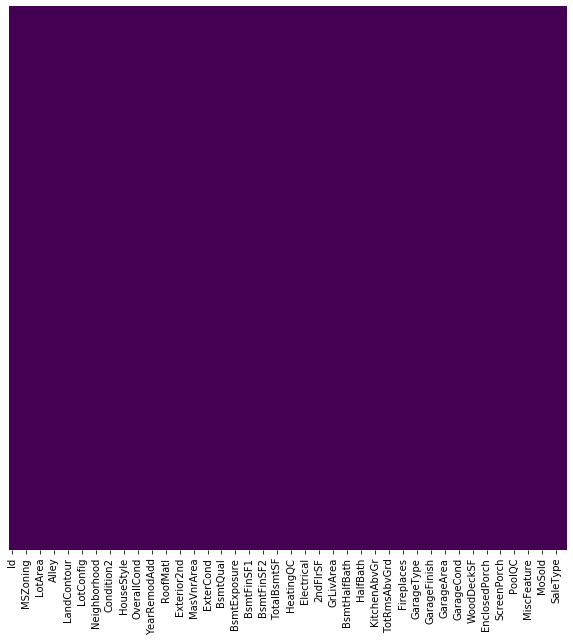

In [19]:
plt.figure(figsize=(10,10))

# train data 
sns.heatmap(both.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#plt.set_title('Cleaned Data')



# Features Engeneering 

### Getting dummies and seprating the data back to training and testing data

In [20]:
both = pd.get_dummies(both,drop_first=True)
X_train = both[:train_num]
test = both[train_num:]
y_train = train['SalePrice']

### Scaling (MinMax)

In [21]:
mms = MinMaxScaler()
X_train_mms = pd.DataFrame(mms.fit_transform(X_train))
test_mms = pd.DataFrame(mms.fit_transform(test))

# Train and test different models

## - Lasso 

### Training Lasso

In [22]:
alpha = np.logspace(-4, 4, 10)
lasso = LassoCV(alphas = alpha).fit(X_train_mms, y_train)
print ('Training Score',lasso.score(X_train_mms, y_train))

scores = cross_val_score(lasso, X_train_mms, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())

Training Score 0.8819358997535717
Cross-validated training scores: [0.90877163 0.91788711 0.89930459 0.79399032 0.86808139 0.86479095
 0.8602656  0.88031616 0.66996117 0.88282073]
Mean of Ccoss-validated training scores: 0.8546189649719445


### Lasso Coefficients

In [23]:
df_coef = pd.DataFrame(lasso.coef_, index=X_train.columns,
                       columns=['coefficients'])
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef.sort_values('coef_abs',ascending=False)
c= df_coef[df_coef['coef_abs']>0].drop('coefficients', axis = 1)

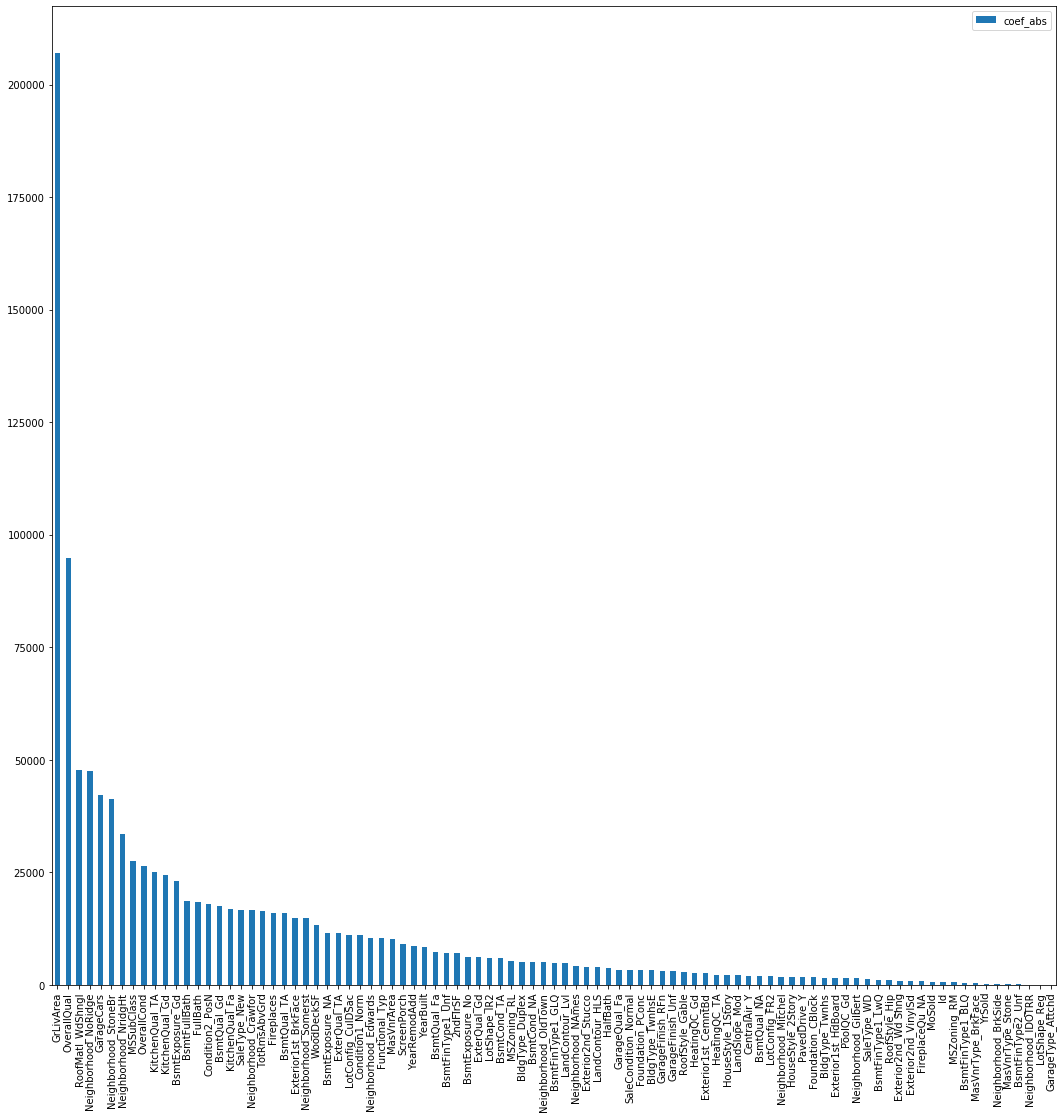

In [24]:
c.sort_values('coef_abs',ascending=False).plot(kind='bar', figsize = (18,18))

### Predicting Lasso

In [25]:
y = lasso.predict(test_mms)

### Saving Lasso predictions

In [26]:
pd.DataFrame({'Id': idTest, 'SalePrice': y}).to_csv('LassoMinMax.csv', index = False)

## - Ridge

### Training Ridge

In [27]:
alpha = np.logspace(-4, 4, 10)
ridge = RidgeCV(alphas = alpha).fit(X_train_mms, y_train)
print ('Training Score',ridge.score(X_train_mms, y_train))

scores = cross_val_score(ridge, X_train_mms, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())

Training Score 0.8728786270867228
Cross-validated training scores: [0.90116065 0.88145903 0.87860475 0.78946643 0.83748226 0.85971524
 0.85520668 0.88222978 0.62932644 0.88989714]
Mean of Ccoss-validated training scores: 0.8404548407247537


### Predicting Ridge

In [28]:
y = ridge.predict(test_mms)

### Saving Ridge Predictions

In [29]:
pd.DataFrame({'Id': idTest, 'SalePrice': y}).to_csv('RidgeCVMinMax.csv', index = False)

## - ElasticNet

### Training ElasticNet

In [30]:
en = ElasticNetCV(l1_ratio=1.).fit(X_train_mms, y_train)
print ('Training Score',en.score(X_train_mms, y_train))
scores = cross_val_score(en, X_train_mms, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())

Training Score 0.8913038655652428
Cross-validated scores: [0.90827336 0.91762461 0.89934433 0.7940741  0.87395674 0.86303955
 0.86319039 0.88177372 0.64461662 0.87645877]
Mean of Cross-validated scores: 0.852235219460327


### Predicting ElasticNet 

In [31]:
y = en.predict(test_mms)

### Saving ElasticNet Predictions

In [32]:
pd.DataFrame({'Id': idTest, 'SalePrice': y}).to_csv('ElasticNetMinMax.csv', index = False)

##  - ElasticNet with GridSearch

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
# Use grid search to tune the parameters:
parametersGrid = {"max_iter": [1, 5, 10],
                     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                     "l1_ratio": np.arange(0.0, 1.0, 0.1)}
eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10).fit(X_train_mms, y_train)

scores = cross_val_score(grid, X_train_mms, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())

Cross-validated scores: [0.88989904 0.8901075  0.88527695 0.79804408 0.84886175 0.86858634
 0.85411448 0.8743726  0.65009786 0.89357276]
Mean of Cross-validated scores: 0.8452933360452569


### Predicting ElasticNet

In [34]:
y = en.predict(test_mms)

### Saving ElasticNet Predictions

In [35]:
pd.DataFrame({'Id': idTest, 'SalePrice': y}).to_csv('ElasticNetGridMinMax.csv', index = False)

# Conclusion

In this expermint we predected the houses prices using number of models. Then, we compared the scores of different models. We can see that lasso has the best prediction score.
